In [1]:
!pip install category_encoders
import category_encoders
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 343.7 kB/s eta 0:00:00


Dataset: https://archive.ics.uci.edu/dataset/942/rt-iot2022

# Run all

## Osnovne informacije o dataset-u

In [3]:
# Učitavanje deljenog CSV fajla
file_id = '1xKNtBdOV-HS2wwKR8qXFjzHATi2M6EK0'
destination = 'RT_IOT2022.CSV'

download_url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(download_url, destination, quiet=False)

dt = pd.read_csv(destination)
dt.shape

Downloading...
From: https://drive.google.com/uc?id=1xKNtBdOV-HS2wwKR8qXFjzHATi2M6EK0
To: /content/RT_IOT2022.CSV
100%|██████████| 54.8M/54.8M [00:00<00:00, 85.8MB/s]


(123117, 85)

In [4]:
dt.sample(10)

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
28064,7273,10115,21,tcp,-,0.000004,1,1,1,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping
86947,66156,59291,21,tcp,-,0.000002,1,1,1,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping
94263,73472,62423,21,tcp,-,0.000001,1,1,1,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping
34288,13497,16339,21,tcp,-,0.000000,1,0,1,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping
80242,59451,11709,21,tcp,-,0.000004,1,1,1,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping
105318,84527,48395,21,tcp,-,0.000004,1,1,1,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping
10422,6276,58184,443,tcp,ssl,1.530672,14,12,3,9,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64240,26847,0,Thing_Speak
45504,24713,27556,21,tcp,-,0.000004,1,1,1,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping
314,314,52701,1883,tcp,mqtt,32.097873,9,5,3,3,...,0.0,2.979834e+07,2.979834e+07,2.979834e+07,2.979834e+07,0.0,64240,26847,502,MQTT_Publish
93461,72670,39361,21,tcp,-,0.000000,1,1,1,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [6]:
# Provera da li postoje null vrednosti
dt.isnull().sum()

,0
Unnamed: 0,0
id.orig_p,0
id.resp_p,0
proto,0
service,0
...,...
idle.std,0
fwd_init_window_size,0
bwd_init_window_size,0
fwd_last_window_size,0


In [ ]:
# Provera da li postoje duplikati (identične torke)
print(dt.duplicated().sum())

0


Kategoričke varijable je potrebno encodovati u numeričke

Identifikovane kategoričke varijable: proto, service, Attack_type

## Pregled target varijable -> Attack_type

In [ ]:
# Provera vrednosti target varijable
dt['Attack_type'].unique()

array(['MQTT_Publish', 'Thing_Speak', 'Wipro_bulb', 'ARP_poisioning',
       'DDOS_Slowloris', 'DOS_SYN_Hping', 'Metasploit_Brute_Force_SSH',
       'NMAP_FIN_SCAN', 'NMAP_OS_DETECTION', 'NMAP_TCP_scan',
       'NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN'], dtype=object)

Svakoj torki dataset-a odgvara jedna od 12 predstavljenih vrsta napada. Među tih 12 vrsta, 4 su obrasci normalnog ponašanja, a ostalih 8 predstavlja neku vrstu hakerskog napada na mrežu. Istrenirani modeli mašinskog učenja biće u mogućnosti da predvide da li je nešto napad (1) ili nije napad (0). Naredni korak jeste mapiranje predstavljenih vrsta u to da li u pitanju normalno ponašanje ili napad.

In [ ]:
dt['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

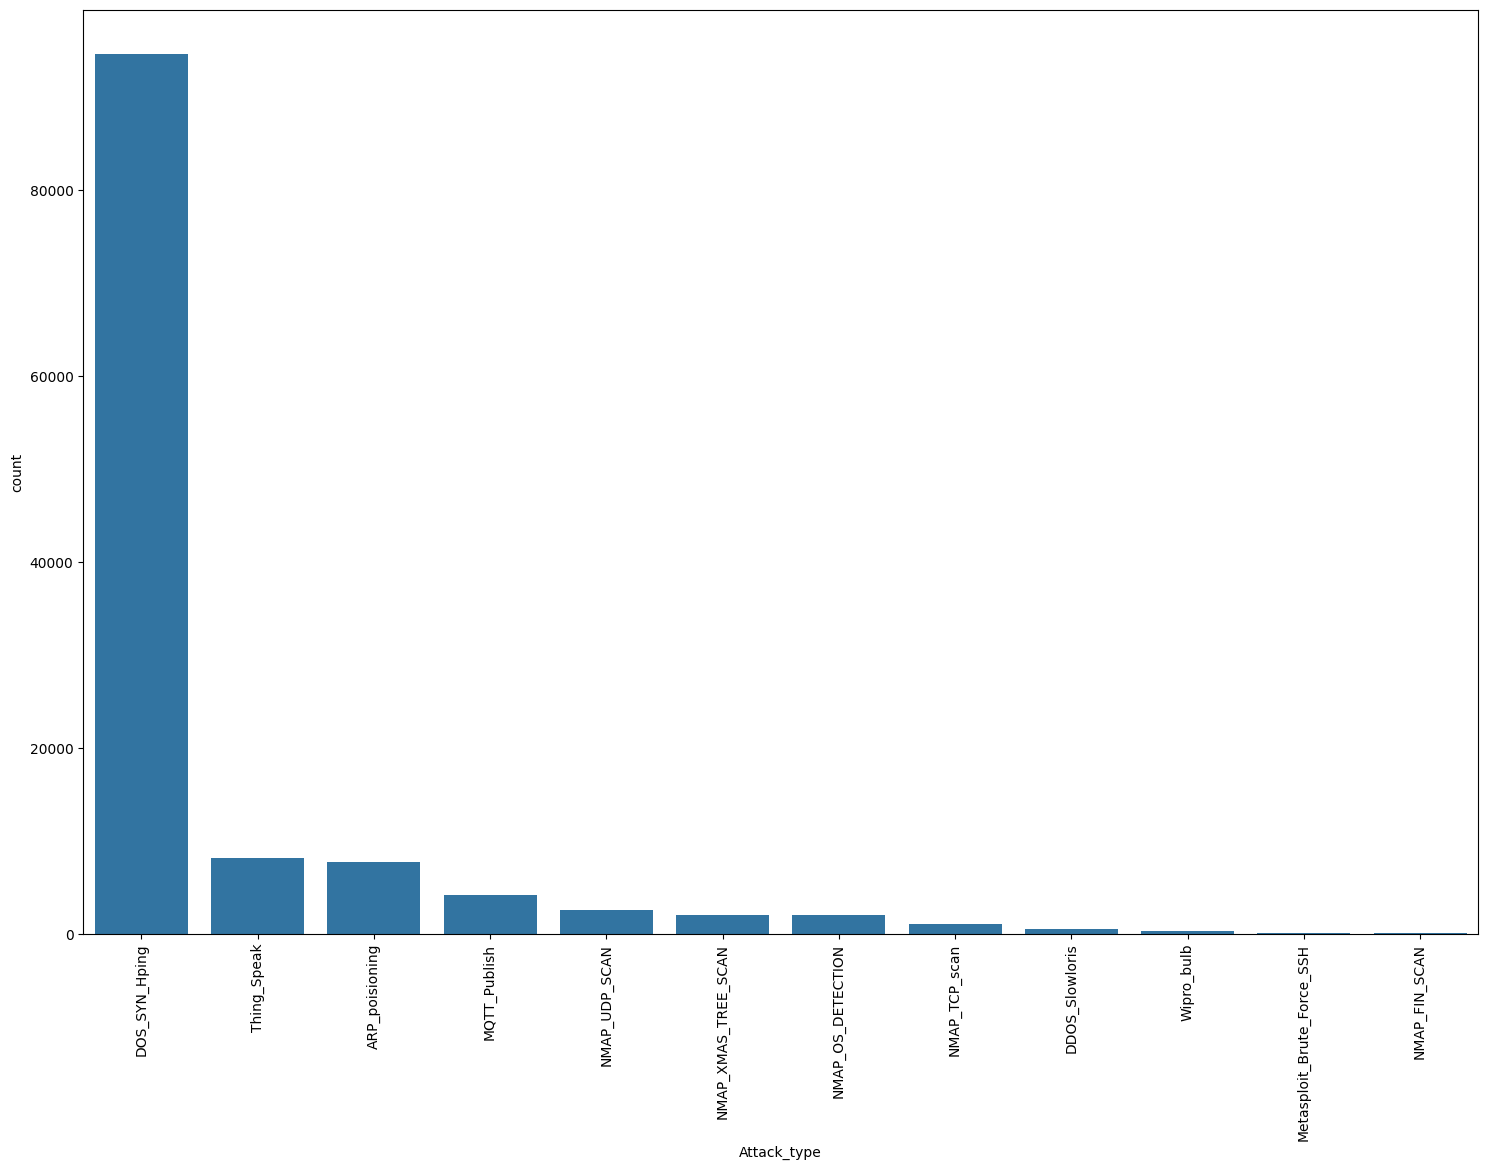

In [ ]:
plt.figure(figsize = (18,12))
sns.countplot(x = dt['Attack_type'], data = dt, order=dt['Attack_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


  
  Vrednosti ćemo mapirati u 0 ili 1 u skladu sa tim da li je napad ili ne.

  **BINARNA KLASIFIKACIJA**

*   1 (pozitivan slucaj - napad se desio)
*   0 (negativan slucaj - napad se nije desio)




In [ ]:
# Definisanje koje vrste želimo da označimo kao 1 (napad), a koje kao 0 (normalna aktivnost)
attack_mapping = {
    'MQTT_Publish': 0, 'Thing_Speak': 0, 'Wipro_bulb': 0, 'DOS_SYN_Hping': 1, 'ARP_poisioning': 1, 'NMAP_UDP_SCAN': 1,
    'NMAP_XMAS_TREE_SCAN': 1, 'NMAP_OS_DETECTION': 1, 'NMAP_TCP_scan': 1, 'DDOS_Slowloris': 1, 'DOS_SYN_Hping' : 1,
    'Metasploit_Brute_Force_SSH': 1, 'NMAP_FIN_SCAN': 1,
}

# Primena mapiranja
dt['encoded_attack'] = dt['Attack_type'].map(attack_mapping)
dt.sample(10)

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type,encoded_attack
104,104,44357,1883,tcp,mqtt,32.076896,9,5,3,3,...,2.976048e+07,2.976048e+07,2.976048e+07,2.976048e+07,0.0,64240,26847,502,MQTT_Publish,0
11833,7687,39316,80,tcp,http,0.835610,8,6,2,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64240,26847,501,Thing_Speak,0
46015,25224,28067,21,tcp,-,0.000004,1,1,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping,1
79085,58294,56232,21,tcp,-,0.000004,1,1,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping,1
38403,17612,20455,21,tcp,-,0.000004,1,1,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping,1
53927,33136,36050,21,tcp,-,0.000004,1,1,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping,1
54604,33813,36727,21,tcp,-,0.000001,1,1,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping,1
94479,73688,62639,21,tcp,-,0.000001,1,1,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping,1
33072,12281,15123,21,tcp,-,0.000004,1,1,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping,1
90950,70159,60760,21,tcp,-,0.000004,1,1,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping,1


In [ ]:
# brisanje stare kolone koja predstavlja vrstu napada
dt.drop(['Attack_type'], axis=1, inplace=True)
dt.head(10)

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,encoded_attack
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,0
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,0
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,0
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,0
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,0
5,5,48579,1883,tcp,mqtt,31.869686,9,5,3,3,...,0.0,2.982555e+07,2.982555e+07,2.982555e+07,2.982555e+07,0.0,64240,26847,502,0
6,6,54063,1883,tcp,mqtt,32.094711,9,5,3,3,...,0.0,2.982342e+07,2.982342e+07,2.982342e+07,2.982342e+07,0.0,64240,26847,502,0
7,7,33457,1883,tcp,mqtt,32.104011,9,5,3,3,...,0.0,2.979543e+07,2.979543e+07,2.979543e+07,2.979543e+07,0.0,64240,26847,502,0
8,8,52181,1883,tcp,mqtt,32.026967,9,5,3,3,...,0.0,2.966162e+07,2.966162e+07,2.966162e+07,2.966162e+07,0.0,64240,26847,502,0
9,9,53469,1883,tcp,mqtt,32.048637,9,5,3,3,...,0.0,2.977845e+07,2.977845e+07,2.977845e+07,2.977845e+07,0.0,64240,26847,502,0


## Pregled kategoričkih podataka -> Proto i Service

In [ ]:
# Izdvajanje string i boolean obeležja
selected_features = dt.select_dtypes(include=['object', 'bool'])
print(selected_features)
#--> proto i service su kategoricke

       proto service
0        tcp    mqtt
1        tcp    mqtt
2        tcp    mqtt
3        tcp    mqtt
4        tcp    mqtt
...      ...     ...
123112   tcp       -
123113   tcp       -
123114   tcp       -
123115   tcp       -
123116   tcp       -

[123117 rows x 2 columns]


In [ ]:
# provera koliko ima vrednosti za kategoricke
print(dt['proto'].unique())
print(dt['service'].unique())

['tcp' 'udp' 'icmp']
['mqtt' '-' 'http' 'dns' 'ntp' 'ssl' 'dhcp' 'irc' 'ssh' 'radius']


In [ ]:
print(dt['proto'].value_counts())
print(dt['service'].value_counts())

proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64
service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64


In [ ]:
# service ima i vrednost -, vrsimo proveru koliko torki je ima
count_dash_in_service = dt['service'].value_counts()['-']
print(f"Broj torki sa vrednošću '-': {count_dash_in_service}")

Broj torki sa vrednošću '-': 102861


In [ ]:
# Zamena vrednosti "-" za 'unknown'
# necemo je brisati jer ima 102k torki sa takvim zapisom → mozda se otkrije posle da to obelezje nije relevantno
dt['service'].replace('-', 'unknown', inplace=True)
print(dt['service'].unique())

['mqtt' 'unknown' 'http' 'dns' 'ntp' 'ssl' 'dhcp' 'irc' 'ssh' 'radius']


## Encoding Variables (Proto and Service)

### One hot encoding (Proto)

koristicemo *binary encoding* za service jer ima dosta vrednosti

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Kreiranje instance OneHotEncoder-a
encoder = OneHotEncoder()

# Enkodiranje kategoričke kolone 'category'
encoded_features = encoder.fit_transform(dt[['proto']]).astype(int)

# Konvertovanje u DataFrame
encoded_dt = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['proto']))

# Spajanje enkodiranih kolona sa originalnim DataFrame-om  i smestanje u taj originalni dataframe
dt = pd.concat([dt, encoded_dt], axis=1)

# Prikaz rezultata
print(dt)

        Unnamed: 0  id.orig_p  id.resp_p proto  service  flow_duration  \
0                0      38667       1883   tcp     mqtt      32.011598   
1                1      51143       1883   tcp     mqtt      31.883584   
2                2      44761       1883   tcp     mqtt      32.124053   
3                3      60893       1883   tcp     mqtt      31.961063   
4                4      51087       1883   tcp     mqtt      31.902362   
...            ...        ...        ...   ...      ...            ...   
123112        2005      59247      63331   tcp  unknown       0.000006   
123113        2006      59247      64623   tcp  unknown       0.000007   
123114        2007      59247      64680   tcp  unknown       0.000006   
123115        2008      59247      65000   tcp  unknown       0.000006   
123116        2009      59247      65129   tcp  unknown       0.000006   

        fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0                  9          

### Binary encoding (Service)

Za *proto* (ima 3 vrednosti) cemo koristiti  *one hot encoding*

In [ ]:
from category_encoders import BaseNEncoder
# svaku vrednost predstavimo u binarnom broju npr MQTT_Publish ce biti 0001, zatim Thing_Speak 0010 itd
# Kreiranje instance BinaryEncoder-a sa specificiranim prefix-om
# cols specificira koju kolonu kodiramo
# Ako postavimo base=2, enkodiraće se u binarnom sistemu.
encoder = BaseNEncoder(cols=['service'], base=2)

# Enkodiranje kategoričke kolone 'Service'
dt_bin_encoded = encoder.fit_transform(dt['service'])

# Dodavanje enkodiranih kolona u originalni DataFrame
dt = pd.concat([dt, dt_bin_encoded], axis=1)

# brisanje stare kolone SERVICE
dt = dt.drop(['service'], axis=1)

# Prikaz rezultata
print(dt)

        Unnamed: 0  id.orig_p  id.resp_p proto  flow_duration  fwd_pkts_tot  \
0                0      38667       1883   tcp      32.011598             9   
1                1      51143       1883   tcp      31.883584             9   
2                2      44761       1883   tcp      32.124053             9   
3                3      60893       1883   tcp      31.961063             9   
4                4      51087       1883   tcp      31.902362             9   
...            ...        ...        ...   ...            ...           ...   
123112        2005      59247      63331   tcp       0.000006             1   
123113        2006      59247      64623   tcp       0.000007             1   
123114        2007      59247      64680   tcp       0.000006             1   
123115        2008      59247      65000   tcp       0.000006             1   
123116        2009      59247      65129   tcp       0.000006             1   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_p

In [ ]:
dt.head(10)

,Unnamed: 0,id.orig_p,id.resp_p,proto,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,bwd_init_window_size,fwd_last_window_size,encoded_attack,proto_icmp,proto_tcp,proto_udp,service_0,service_1,service_2,service_3
0,0,38667,1883,tcp,32.011598,9,5,3,3,0.281148,...,26847,502,0,0,1,0,0,0,0,1
1,1,51143,1883,tcp,31.883584,9,5,3,3,0.282277,...,26847,502,0,0,1,0,0,0,0,1
2,2,44761,1883,tcp,32.124053,9,5,3,3,0.280164,...,26847,502,0,0,1,0,0,0,0,1
3,3,60893,1883,tcp,31.961063,9,5,3,3,0.281593,...,26847,502,0,0,1,0,0,0,0,1
4,4,51087,1883,tcp,31.902362,9,5,3,3,0.282111,...,26847,502,0,0,1,0,0,0,0,1
5,5,48579,1883,tcp,31.869686,9,5,3,3,0.282400,...,26847,502,0,0,1,0,0,0,0,1
6,6,54063,1883,tcp,32.094711,9,5,3,3,0.280420,...,26847,502,0,0,1,0,0,0,0,1
7,7,33457,1883,tcp,32.104011,9,5,3,3,0.280339,...,26847,502,0,0,1,0,0,0,0,1
8,8,52181,1883,tcp,32.026967,9,5,3,3,0.281013,...,26847,502,0,0,1,0,0,0,0,1
9,9,53469,1883,tcp,32.048637,9,5,3,3,0.280823,...,26847,502,0,0,1,0,0,0,0,1


## Provera ostalih (numeričkih) varijabli

### proto i zastavice
Zastavice se mogu proslediti kao deo header-a TCP paketa. Iz tog razloga vršimo proveru da li se u datasetu zastavice pojavljuju samo u slučaju TCP protokola.

Zastavice ECE i CWR signaliziraju pojavu zagušenja mreže. Proveravamo uticaj zagušenja mreže na target varijablu.

**Prva tačka** - proveravamo da li su podaci cisti jer zastavice ne treba da budu  postavljene ako nije u pitanju TCP protokol

In [ ]:
# uzimamo torke ciji je protokol ICMP ili UDP
list_of_proto_not_TCP = dt[dt['proto'] != 'tcp']
print(list_of_proto_not_TCP['proto'].value_counts())
print(len(list_of_proto_not_TCP))

# uzimamo kolone/property/feature koji se odnose na zastavice (FLAG)
list_of_flags_in_proto_not_TCP = [col for col in dt.columns if 'flag' in col]
print(list_of_flags_in_proto_not_TCP)

# proveravamo da li u redovima koji se odnose na ICMP i UDP kolone
# imamo vrednost za broj zastavica koji je veci od 0
# da bismo prosli kroz dataframe moramo koristiti iterrows (daje index and row, ne moramo oba iskoristiti)
rows_with_flags_gt_0 = []
for index, row in list_of_proto_not_TCP.iterrows():
    if any(row[col] > 0 for col in list_of_flags_in_proto_not_TCP):
        rows_with_flags_gt_0.append(row)

print(len(rows_with_flags_gt_0))

proto
udp     12633
icmp       57
Name: count, dtype: int64
12690
['flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count']
0


--> ZAKLJUCAK: nema nepravilnih podataka gledajuci ovaj aspekt

**Druga tačka** - Proveravamo da li je došlo do zagušenja mreže i da li to utiče na konačnu varijablu

--> do zagusenja mreze je doslo ako je poslata ECE zastavica od strane primaoca; potrebno je i da se vratila CWR zastavica, kao i da fwd_init_window_size > fwd_last_window_size te bi značilo da se smanjila velicina prozora za slanje tj da se reagovalo na zagusenje u mrezi

In [ ]:
# preuzimamo torke sa TCP protokolom
list_of_proto_not_TCP = dt[dt['proto'] == 'tcp']
ECE_flags = list_of_proto_not_TCP['flow_ECE_flag_count']
print(ECE_flags.value_counts())
# --> u 61 torci zastavica je poslata 1 put u flowu, u 9 slučajeva je poslata 2 put u flowu...
CWR_flags = list_of_proto_not_TCP['flow_CWR_flag_count']
print(CWR_flags.value_counts())
# --> broj zastavica CWR i ECE u nekom flowu ne mora biti isti, takođe moguće je da se pojavi
# CWR zastavica a da nije bilo ECE zastavice (što vidimo da je slučaj kod jedne torke)

# --> do zagusenja NIJE doslo 110355 puta (a onaj 1 put do 110356 je upitan zasto je do njega doslo)

flow_ECE_flag_count
0    110355
1        61
2         9
3         1
4         1
Name: count, dtype: int64
flow_CWR_flag_count
0    110356
2        40
1        25
3         5
4         1
Name: count, dtype: int64


--> Kad je poslat CWR i veličina prozora je morala da se smanji sad cemo proveriti da li je to slucaj

In [ ]:
CWR_flags_yes = list_of_proto_not_TCP[list_of_proto_not_TCP['flow_CWR_flag_count'] > 0]
window_size_not_reduced = []
for index, row in CWR_flags_yes.iterrows():
    # Check if any flag value is greater than 0
    window_size_difference = row['fwd_init_window_size'] - row['fwd_last_window_size']
    if window_size_difference <= 0:
        # row is series so window_size_not_reduced is list of series
        window_size_not_reduced.append(row)
print('Broj slucajeva u kojima je zastavica CWR postavljena, a prozor se nije smanjio:')
print(len(window_size_not_reduced))
# zastavica je postavljena 71 put, a 23 puta prozor NIJE smanjen, to je problem --> mozda ima veze sa hakerskim napadima pa cu uraditi korelaciju da vidim uticaj

Broj slucajeva u kojima je zastavica CWR postavljena, a prozor se nije smanjio:
23


Provera da li su te 23 torke oznacene kao napad ili kao normalna aktivnost

In [ ]:
window_size_not_reduced = pd.DataFrame(window_size_not_reduced)

declared_as_attack = window_size_not_reduced[window_size_not_reduced['encoded_attack'] == 0]
print(len(declared_as_attack))

#--> svi flowovi gde se ne smanjuje prozor kad se salje CWR su oznaceni kao NORMALNE AKTIVNOSTI
# zakljucak - da li ce se smanjiti prozor ili ne, ne utiče na konacnu varijablu

23


Zakljuceno je da je u 70 torki doslo do zagusenja mreze pa vrsimo proveru da li to zagusenje utice na klasifikaciju

In [ ]:
# dodacu u dataset jos jedan property koji oznacava da li je doslo do zagusenja ili nije 'network_congestion'
# Dodavanje novog obeležja 'network_congestion' na osnovu 'number_of_flags'
dt['congestion_network'] = dt['flow_ECE_flag_count'].apply(lambda x: 1 if x > 0 else 0)
#print(dt.head())

# --> sad hocu da vidim korelaciju izmedju zagusenja mreze i toga da li je nesto napad ili nije

# Izračunavanje Pearsonovog koeficijenta korelacije
correlation = dt['congestion_network'].corr(dt['encoded_attack'])
print(f"Pearson's correlation coefficient: {correlation}")

Pearson's correlation coefficient: -0.07193742433109061


--> ZAKLJUČAK: korelacija je -0.07 sto znaci da je blizu 0 pa je zanemarljiva te zakljucujemo da zakrcenje mreze kao ni velicina prozora ne uticu na to da li je nesto napad ili ne

In [ ]:
# brisanje kategoricke kolone PROTO (dalje koristimo samo encodovanu vrednost)
dt = dt.drop(['proto'], axis=1)

In [ ]:
df = dt.copy()

## Dimensionality reduction (PCA)

Provera varijanse (odstupanja od srednje vrednosti) koristeci metodu Principal analysis


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 91 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   flow_duration             123117 non-null  float64
 4   fwd_pkts_tot              123117 non-null  int64  
 5   bwd_pkts_tot              123117 non-null  int64  
 6   fwd_data_pkts_tot         123117 non-null  int64  
 7   bwd_data_pkts_tot         123117 non-null  int64  
 8   fwd_pkts_per_sec          123117 non-null  float64
 9   bwd_pkts_per_sec          123117 non-null  float64
 10  flow_pkts_per_sec         123117 non-null  float64
 11  down_up_ratio             123117 non-null  float64
 12  fwd_header_size_tot       123117 non-null  int64  
 13  fwd_header_size_min       123117 non-null  i

In [ ]:
# Uklanjanje ciljne varijable iz PCA analize
df = dt.copy()
df = df.drop('encoded_attack', axis=1)

# Standardizacija podataka pre primene PCA
X = df.values
X = StandardScaler().fit_transform(X)

# Primena PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Determine the number of components to keep (e.g., 95% variance)
threshold = 0.92
num_components_to_keep = np.argmax(cumulative_variance >= threshold) + 1

print("Number of components to keep:", num_components_to_keep)

# Get the names of the original features
feature_names = df.columns

# Get the components and map to feature names
pca_components = pca.components_[:num_components_to_keep]
feature_importance = pd.DataFrame(pca_components.T, index=feature_names)

print("Feature importance for the selected components:\n", feature_importance)

# Optionally, you can also drop features based on their importance in the selected components
# For example, drop features that have very low absolute values in all selected components
feature_importance_threshold = 0.2
features_to_drop = feature_importance.abs().max(axis=1) < feature_importance_threshold
features_to_drop.to_csv('PCAresult.csv')

# Print features to keep and drop
features_to_keep = feature_names[~features_to_drop]
features_to_drop = feature_names[features_to_drop]

print("Features to keep:\n", features_to_keep)
print("Features to drop:\n", features_to_drop)

Number of components to keep: 24
Feature importance for the selected components:
                           0         1         2         3         4   \
Unnamed: 0         -0.078275  0.036397 -0.121069  0.066288  0.033482   
id.orig_p           0.042825 -0.017109  0.069261 -0.038994 -0.015941   
id.resp_p          -0.002893 -0.013171  0.106811  0.001189 -0.016235   
flow_duration       0.074936  0.024095  0.048260  0.125948  0.313675   
fwd_pkts_tot        0.111597  0.118610  0.044924  0.105641  0.238660   
...                      ...       ...       ...       ...       ...   
service_0           0.015533 -0.001957  0.000329 -0.013909  0.004453   
service_1           0.046997  0.024968  0.205947 -0.160257  0.014296   
service_2          -0.059899  0.072880 -0.232267 -0.004780  0.062943   
service_3           0.149328 -0.116146  0.005621  0.023453 -0.086720   
congestion_network  0.025586  0.002856 -0.006191 -0.035341  0.007685   

                          5         6         7      

Provericemo i korelacije i VIF, i na osnovu preseka svih rezultata zakljuciti koje varijable ce biti ukljucene u dalje procese treniranja algoritma.

## Variance inflation factor (VIF)

In [ ]:
X_vif = df
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

vif_threshold = 10
features_to_keep_vif = vif_data[vif_data["VIF"] < vif_threshold]["Feature"]
features_to_drop_vif = vif_data[vif_data["VIF"] >= vif_threshold]["Feature"]

print("\nFeatures to keep after VIF analysis:\n", features_to_keep_vif)
print("Features to drop after VIF analysis:\n", features_to_drop_vif)


Features to keep after VIF analysis:
 0               Unnamed: 0
1                id.orig_p
2                id.resp_p
18     flow_FIN_flag_count
24      fwd_URG_flag_count
26     flow_CWR_flag_count
27     flow_ECE_flag_count
33    bwd_pkts_payload.min
48             bwd_iat.min
61       fwd_subflow_bytes
67           fwd_bulk_rate
68           bwd_bulk_rate
80    bwd_init_window_size
82              proto_icmp
85               service_0
Name: Feature, dtype: object
Features to drop after VIF analysis:
 3          flow_duration
4           fwd_pkts_tot
5           bwd_pkts_tot
6      fwd_data_pkts_tot
7      bwd_data_pkts_tot
             ...        
84             proto_udp
86             service_1
87             service_2
88             service_3
89    congestion_network
Name: Feature, Length: 74, dtype: object


In [ ]:
features_to_drop_vif.to_csv('VIFresult.csv')

## Provera korelacija

In [ ]:
correlation_matrix = dt.corr()
correlation_matrix.to_csv('correlation_matrix.csv')


### Provera korelacija za informacije o paketima

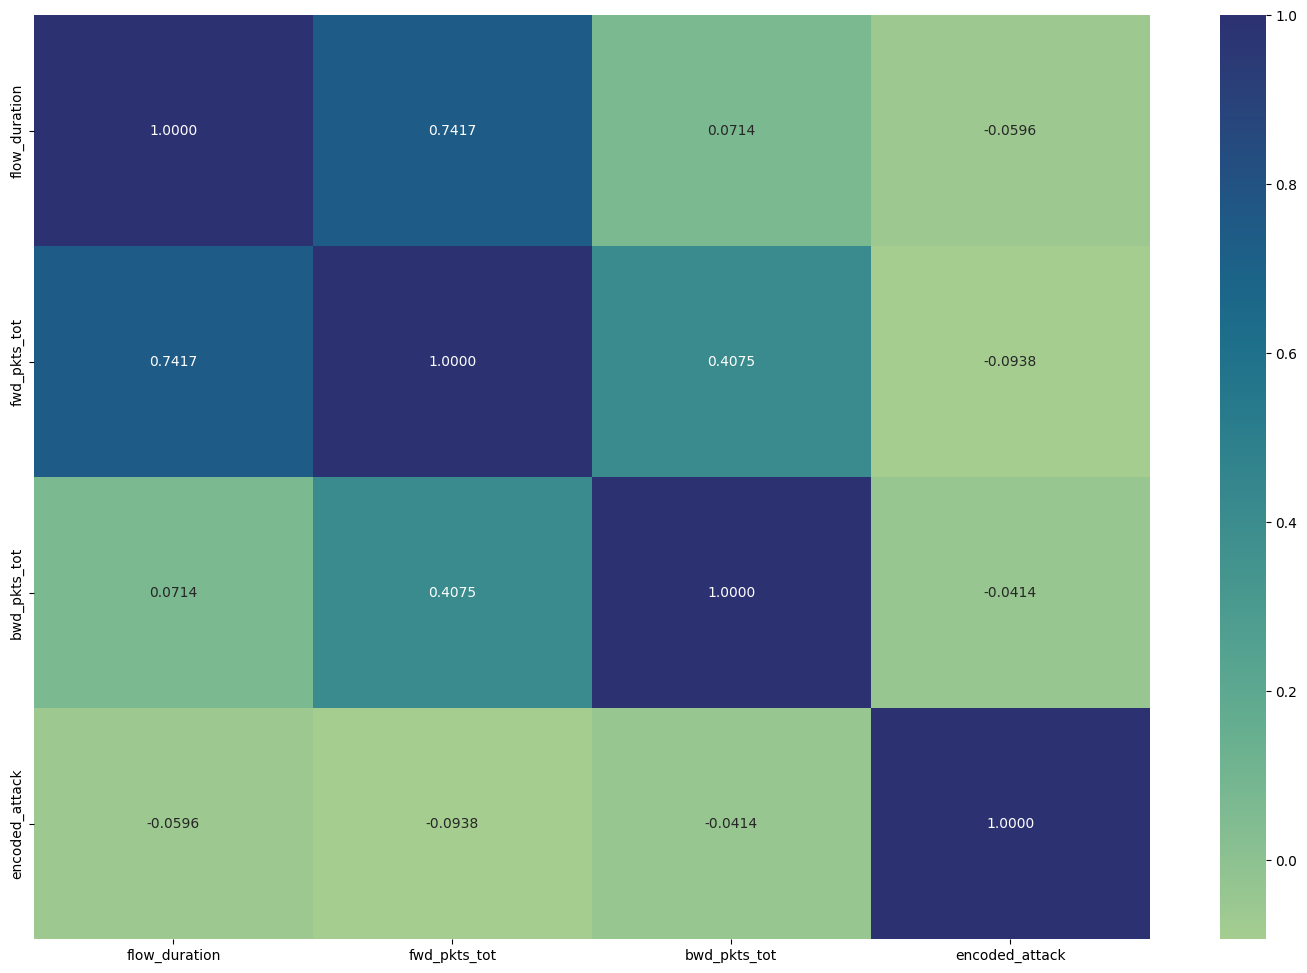

In [ ]:
plt.figure(figsize=(18,12))
# proveravamo korelaciju izmedju kolona prikazanih u listi
testset = dt[['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'encoded_attack']]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

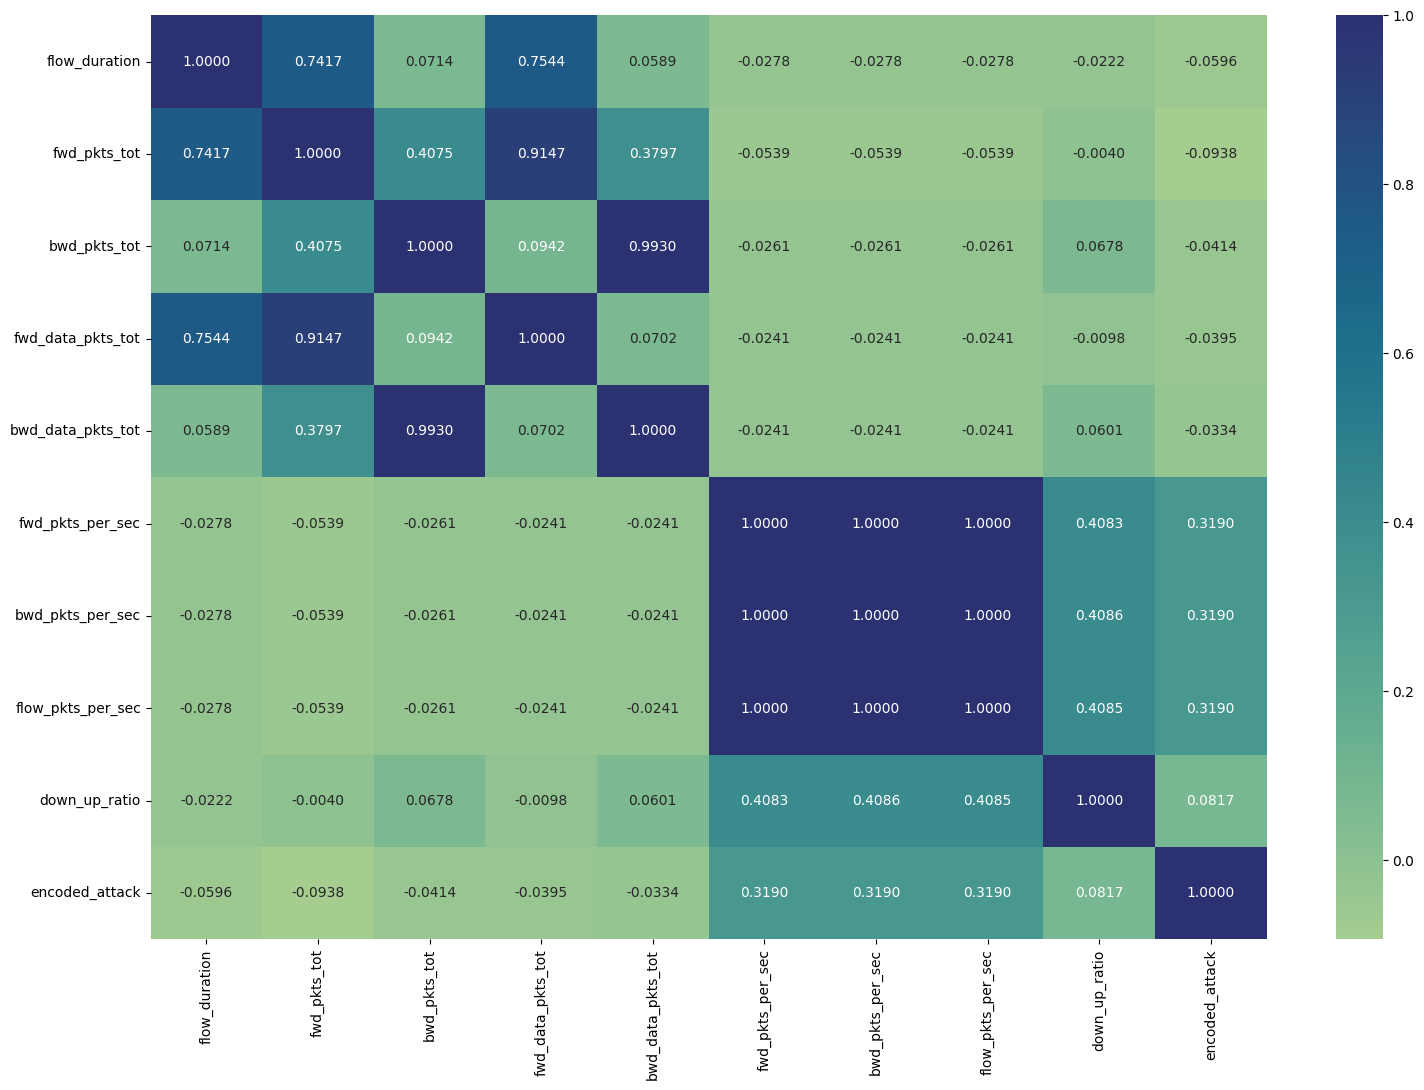

In [ ]:
plt.figure(figsize=(18,12))
testset = dt[[ 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot',
              'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio', 'encoded_attack']]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

Na gornjoj heat-mapi zaključujemo da su bwd_pkts_tot i bwd_data_pkts_tot u velikoj korelaciji te se neki od njih briše

Isto važi i za fwd_pkts_tot i fwd_data_pkts_tot

Kolicina paketa po sekundi (flow_pkts_per_sec, fwd_pkts_per_sec, bwd_pkts_per_sec) su u velikoj korelaciji pa ćemo ostaviti samo flow_pkts_per_sec

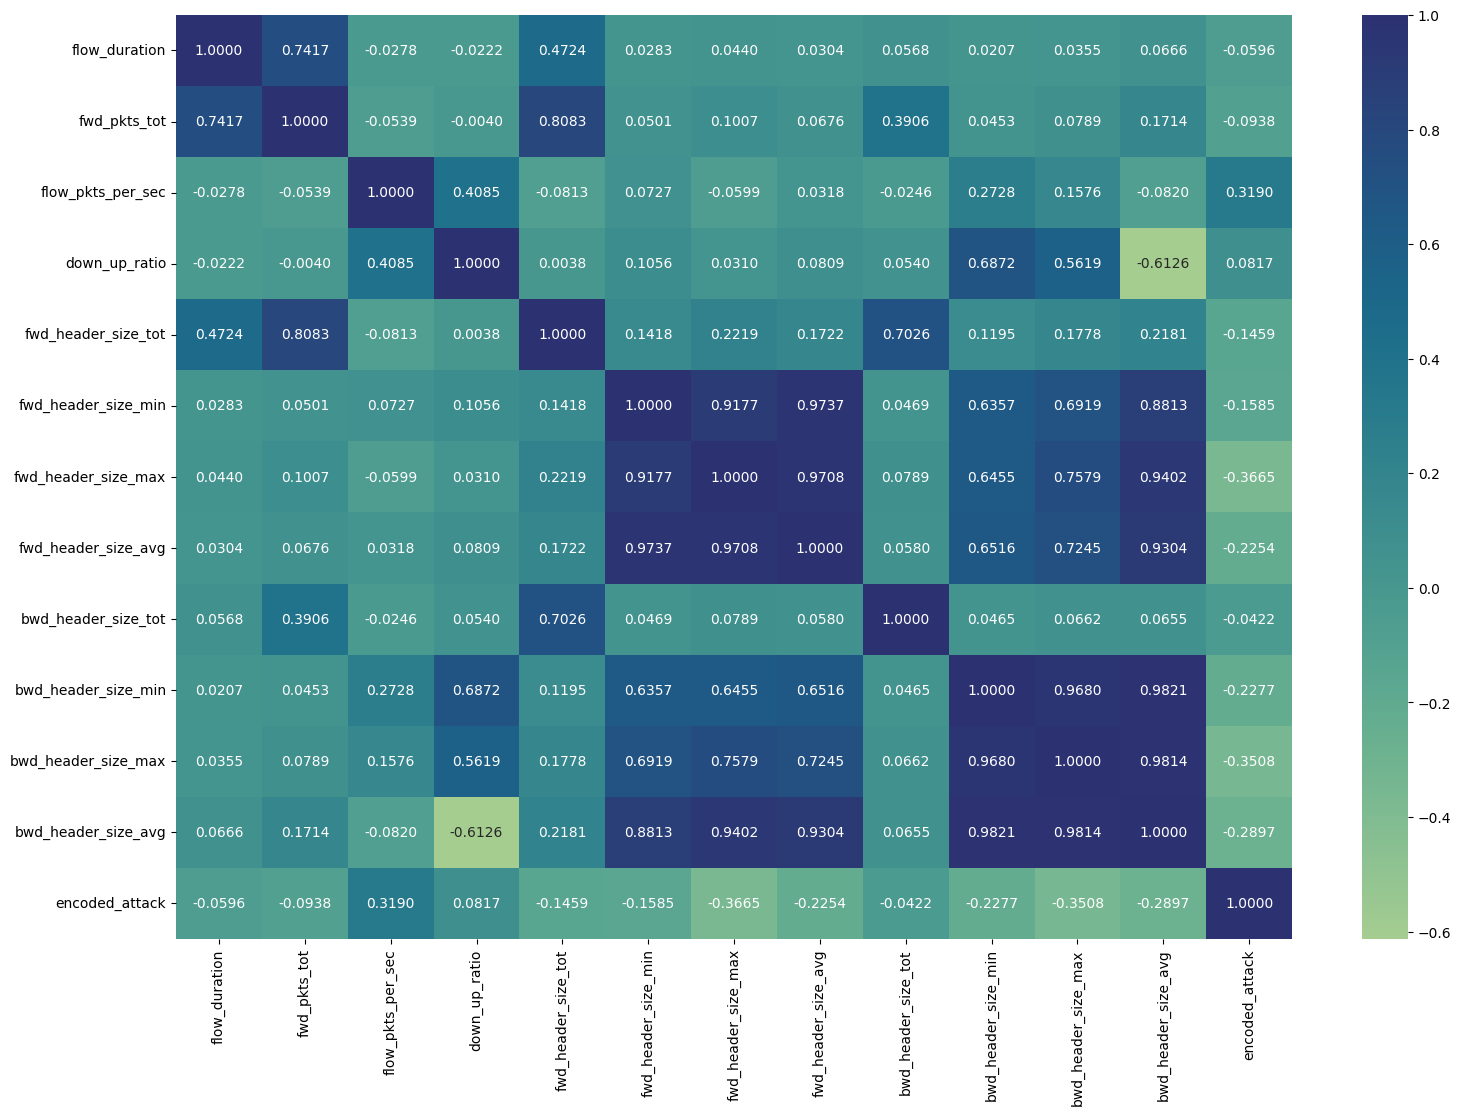

In [ ]:
#Kreiramo nove varijable koje ce se odnositi na prosecnu velicinu zaglavlja paketa
plt.figure(figsize=(18,12))
dt['fwd_header_size_avg'] = dt['fwd_header_size_tot'] / dt['fwd_pkts_tot']
dt['bwd_header_size_avg'] = dt['bwd_header_size_tot'] / dt['bwd_pkts_tot']
testset = dt[[ 'flow_duration','fwd_pkts_tot', 'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max', 'fwd_header_size_avg',
              'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max', 'bwd_header_size_avg', 'encoded_attack']]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

In [ ]:
print(dt['fwd_header_size_avg'].isnull().sum())
print(dt['bwd_header_size_avg'].isnull().sum())

44
15228


In [ ]:
dt['fwd_header_size_avg'].fillna(0, inplace=True)
dt['bwd_header_size_avg'].fillna(0, inplace=True)
print(dt['fwd_header_size_avg'].isnull().sum())
print(dt['bwd_header_size_avg'].isnull().sum())

0
0


Prethodno je zaključeno da brisemo fwd_pkts_tot varijabu. U datasetu dostupna je i vrednost za minimalnu veličinu zaglavlja kao i maksimalnu. Pretpostavka je da nam te vrednosti nisu nužne, te je ideja bila da ih zamenimo AVG vrednosću.

Zaključak: izbaciti min i max, ostaviti avg vrednost za velicinu zaglavlja paketa

In [ ]:
#dt = dt.drop([['id.orig_p', 'id.resp_p']], axis=1)
dt = dt.drop(columns=['fwd_pkts_tot', 'fwd_data_pkts_tot'])
dt = dt.drop(columns=['fwd_pkts_per_sec', 'bwd_pkts_per_sec'])
dt = dt.drop(columns=['bwd_pkts_tot', 'bwd_data_pkts_tot'])
dt = dt.drop(columns=['fwd_header_size_min', 'fwd_header_size_max'])

In [ ]:
dt = dt.drop(columns=['bwd_header_size_min', 'bwd_header_size_max'])

### Provera korelacija za zastavice

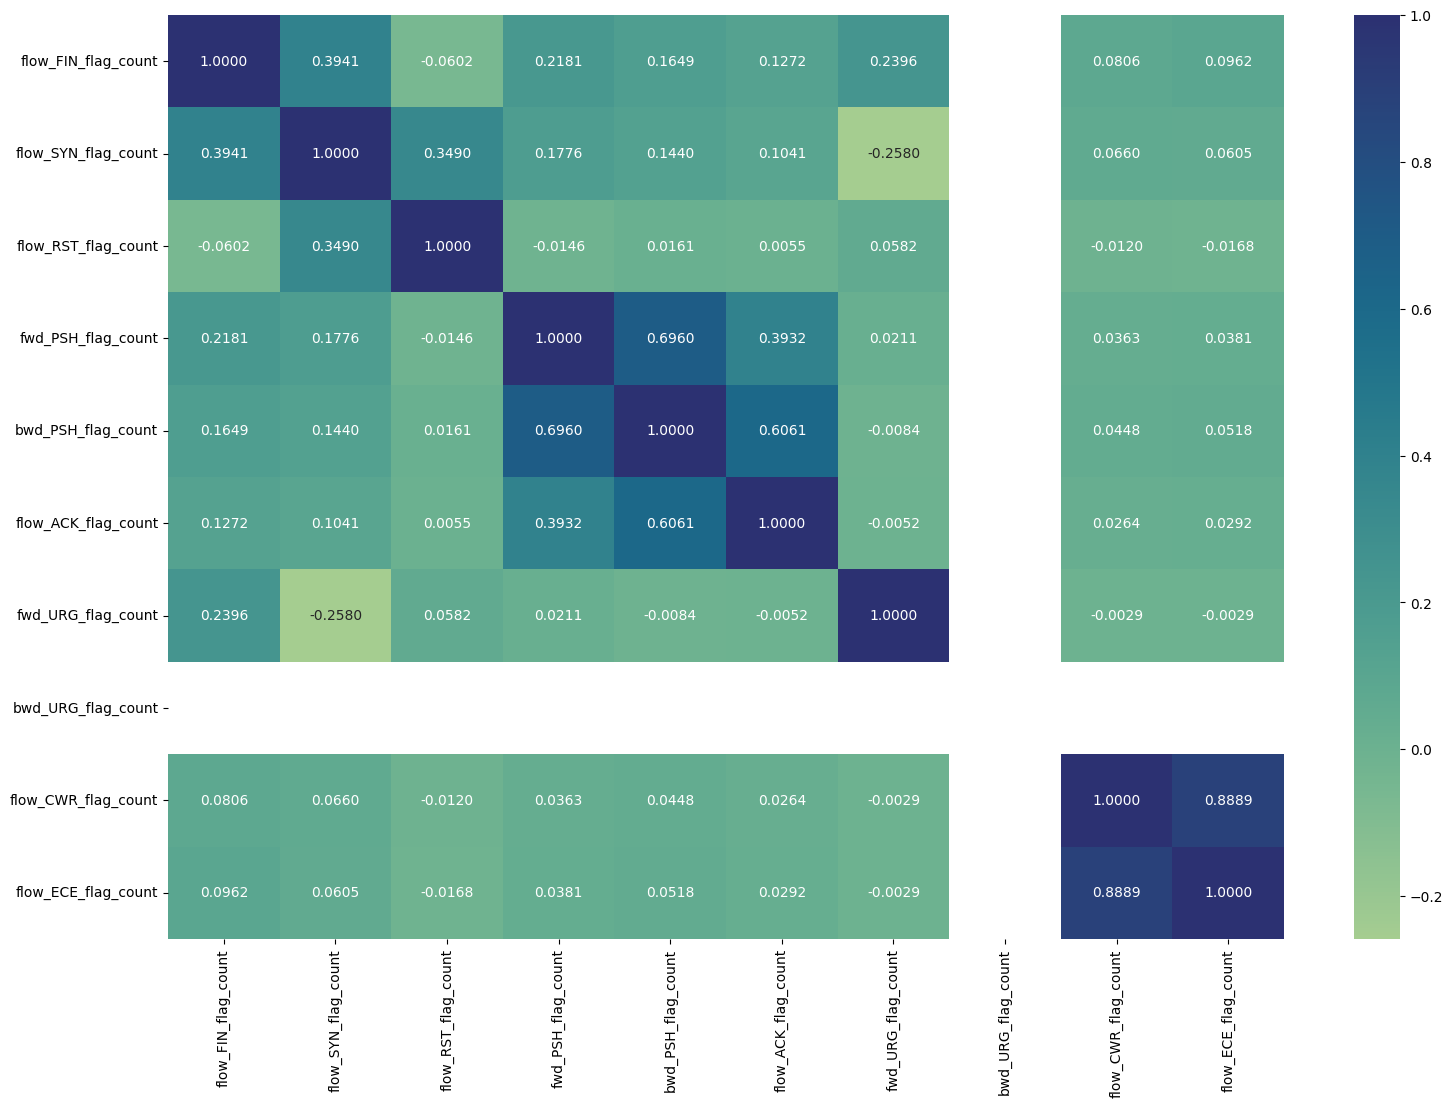

In [ ]:
plt.figure(figsize=(18,12))

testset = dt[['flow_FIN_flag_count',
    'flow_SYN_flag_count',
    'flow_RST_flag_count',
    'fwd_PSH_flag_count',
    'bwd_PSH_flag_count',
    'flow_ACK_flag_count',
    'fwd_URG_flag_count',
    'bwd_URG_flag_count',
    'flow_CWR_flag_count',
    'flow_ECE_flag_count']]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

In [ ]:
print(dt['fwd_URG_flag_count'].value_counts())
print(dt['bwd_URG_flag_count'].value_counts())   #bwd_URG_flag_count sve nule znaci nikad nije postavljena-> brisemo

fwd_URG_flag_count
0    121111
1      2006
Name: count, dtype: int64
bwd_URG_flag_count
0    123117
Name: count, dtype: int64


CWR i ECE zastavice su u visokoj korelaciji. S obzirom da je postavljanje CWR zastavice odgovor na tcp paket sa ECE zastavicom, brisemo kolonu  flow_CWR_flag_count

In [ ]:
dt = dt.drop(columns=['bwd_URG_flag_count', 'flow_CWR_flag_count'])

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = testset.columns
vif_data["VIF"] = [variance_inflation_factor(testset.values, i) for i in range(len(testset.columns))]
print(vif_data)

               feature       VIF
0  flow_FIN_flag_count  1.600056
1  flow_SYN_flag_count  5.822038
2  flow_RST_flag_count  5.095761
3   fwd_PSH_flag_count  2.020334
4   bwd_PSH_flag_count  2.618251
5  flow_ACK_flag_count  1.594740
6   fwd_URG_flag_count  1.295713
7   bwd_URG_flag_count       NaN
8  flow_CWR_flag_count  4.772675
9  flow_ECE_flag_count  4.785994


### Provera korelacija za PAYLOAD




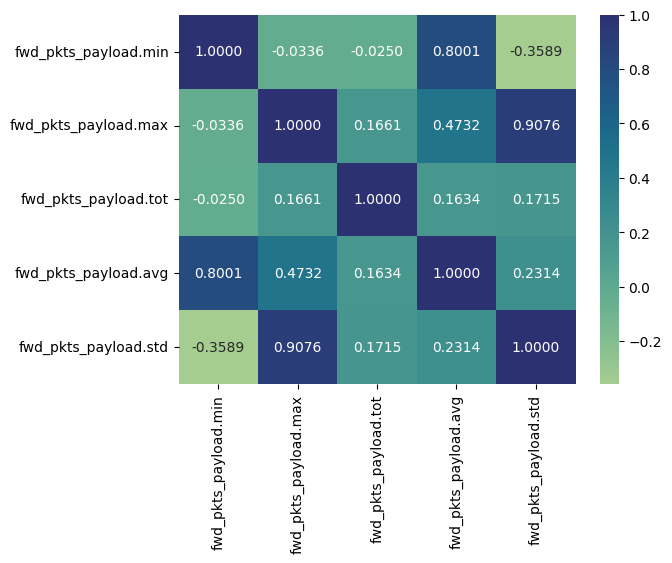

In [ ]:
testset = dt[['fwd_pkts_payload.min',
    'fwd_pkts_payload.max',
    'fwd_pkts_payload.tot',
    'fwd_pkts_payload.avg',
    'fwd_pkts_payload.std',
    ]]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

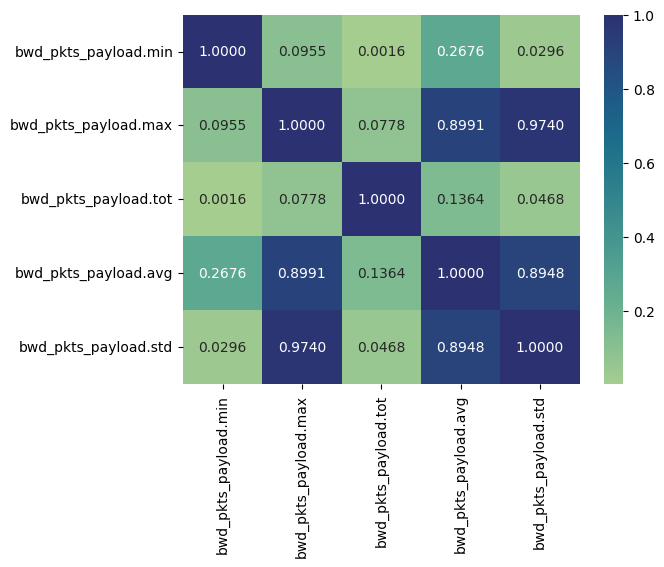

In [ ]:
testset = dt[[
    'bwd_pkts_payload.min',
    'bwd_pkts_payload.max',
    'bwd_pkts_payload.tot',
    'bwd_pkts_payload.avg',
    'bwd_pkts_payload.std'
    ]]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

Izbacujemo bwd_pkts_payload.avg i bwd_pkts_payload.std jer su u korelaciji sa MAX

min, max i tot ostaju

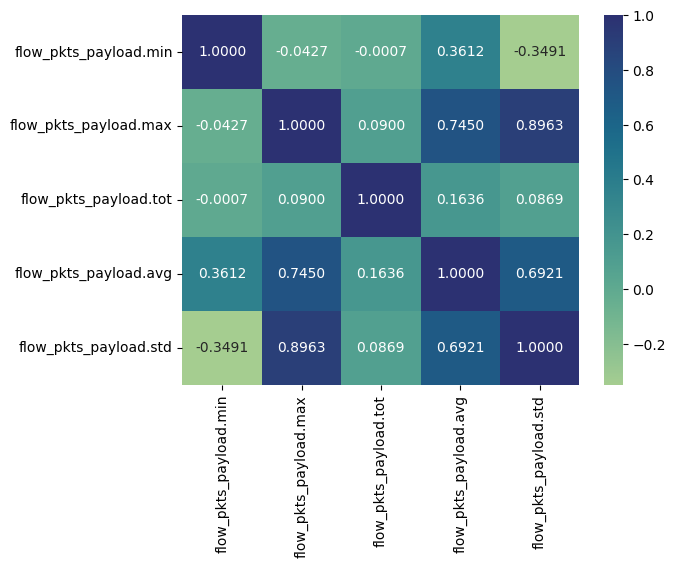

In [ ]:
testset = dt[[
    'flow_pkts_payload.min',
    'flow_pkts_payload.max',
    'flow_pkts_payload.tot',
    'flow_pkts_payload.avg',
    'flow_pkts_payload.std',]]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

Izbacujemo flow_pkts_payload.avg i flow_pkts_payload.std jer su u korelaciji sa MAX

 min, max i tot ostaju




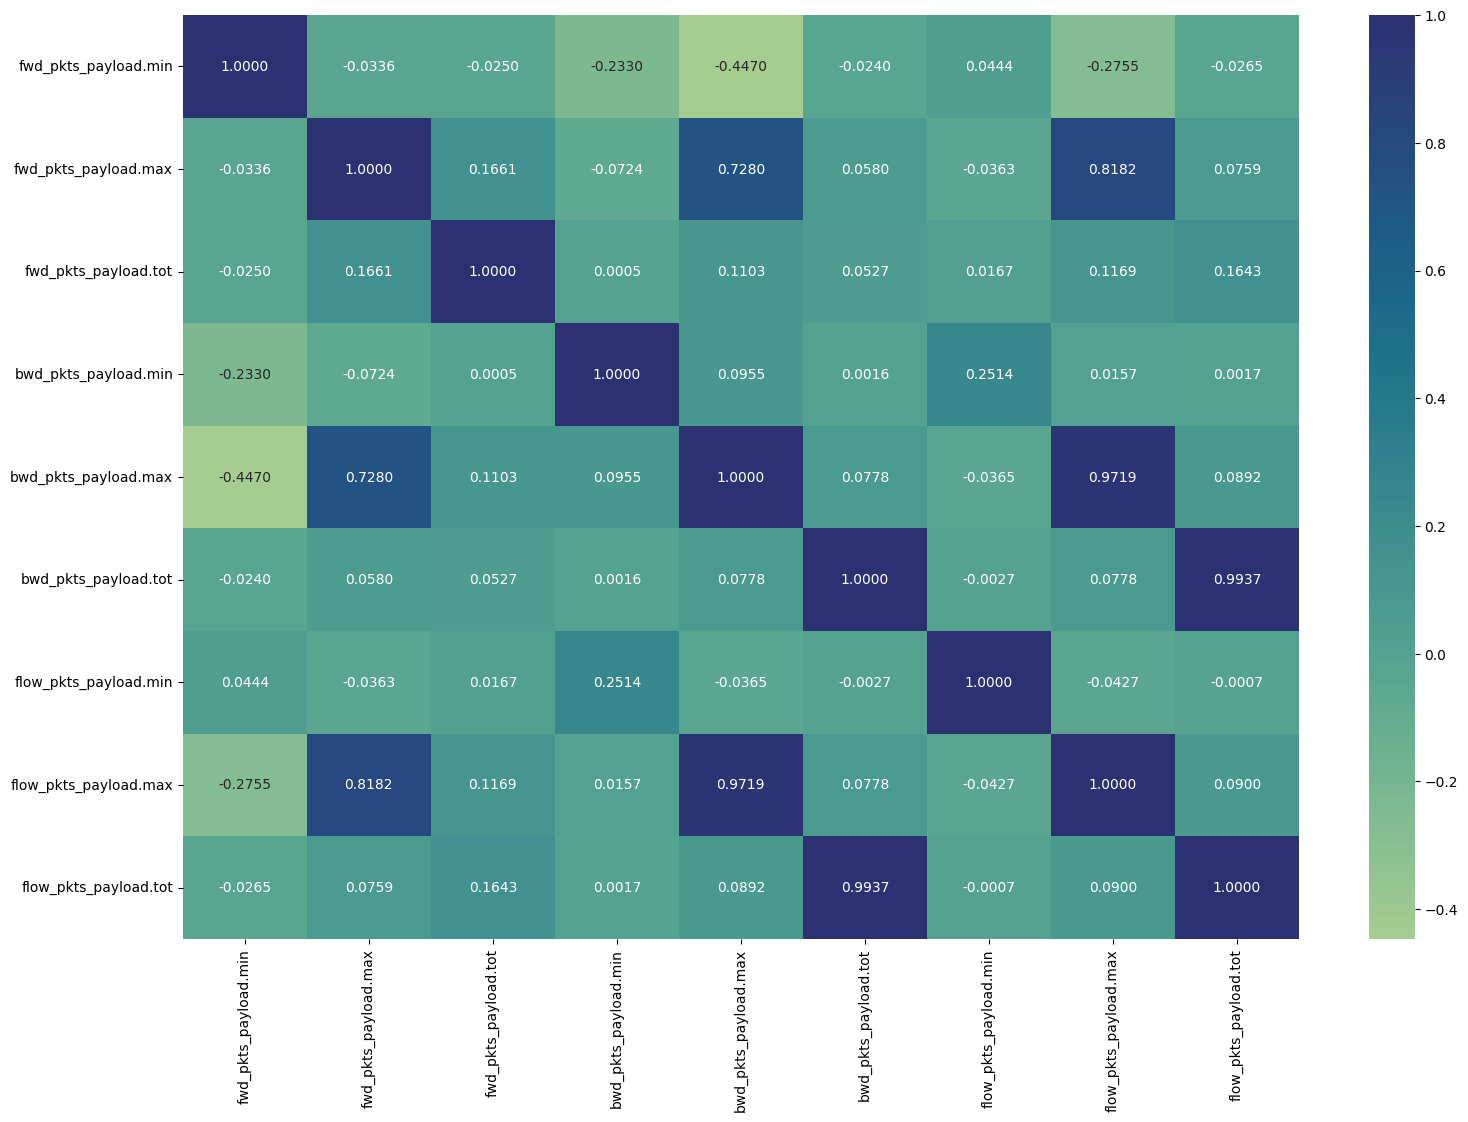

In [ ]:
plt.figure(figsize=(18,12))
testset = dt[[
    'fwd_pkts_payload.min',
    'fwd_pkts_payload.max',
    'fwd_pkts_payload.tot',
    'bwd_pkts_payload.min',
    'bwd_pkts_payload.max',
    'bwd_pkts_payload.tot',
    'flow_pkts_payload.min',
    'flow_pkts_payload.max',
    'flow_pkts_payload.tot',
]]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

Sve tri max vrednosti su u visokoj korelaciji tako da ostavljamo samo flow_pkts_payload.max

In [ ]:
dt = dt.drop(columns=['fwd_pkts_payload.avg', 'fwd_pkts_payload.std'])
dt = dt.drop(columns=['bwd_pkts_payload.avg', 'bwd_pkts_payload.std'])
dt = dt.drop(columns=['flow_pkts_payload.avg', 'flow_pkts_payload.std'])

In [ ]:
dt = dt.drop(columns=['bwd_pkts_payload.max', 'fwd_pkts_payload.max'])

### Provera korelacija IAT

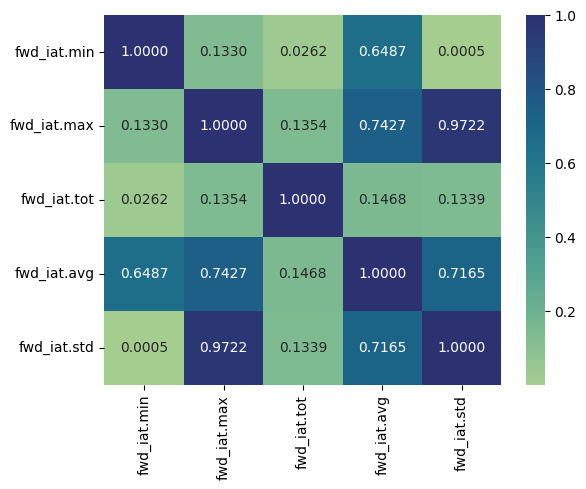

In [ ]:
#plt.figure(figsize=(18,12))
testset = dt[[
'fwd_iat.min',
    'fwd_iat.max',
    'fwd_iat.tot',
    'fwd_iat.avg',
    'fwd_iat.std',
]]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

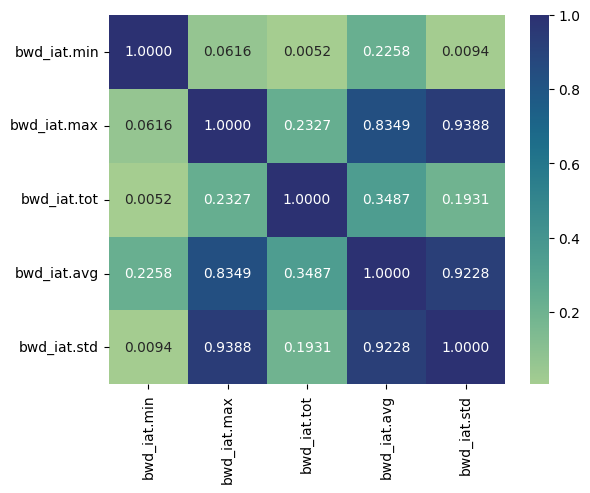

In [ ]:
#plt.figure(figsize=(18,12))
testset = dt[[
    'bwd_iat.min',
    'bwd_iat.max',
    'bwd_iat.tot',
    'bwd_iat.avg',
    'bwd_iat.std',
]]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

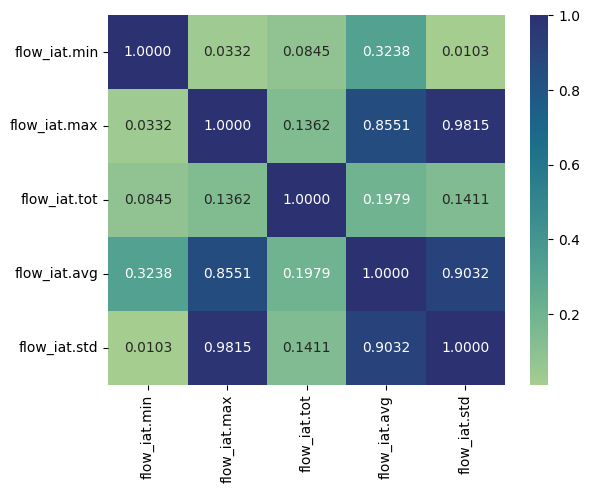

In [ ]:
#plt.figure(figsize=(18,12))
testset = dt[[
    'flow_iat.min',
    'flow_iat.max',
    'flow_iat.tot',
    'flow_iat.avg',
    'flow_iat.std',
]]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

In [ ]:
dt = dt.drop(columns=['fwd_iat.avg', 'fwd_iat.std'])
dt = dt.drop(columns=['bwd_iat.avg', 'bwd_iat.std'])
dt = dt.drop(columns=['flow_iat.avg', 'flow_iat.std'])

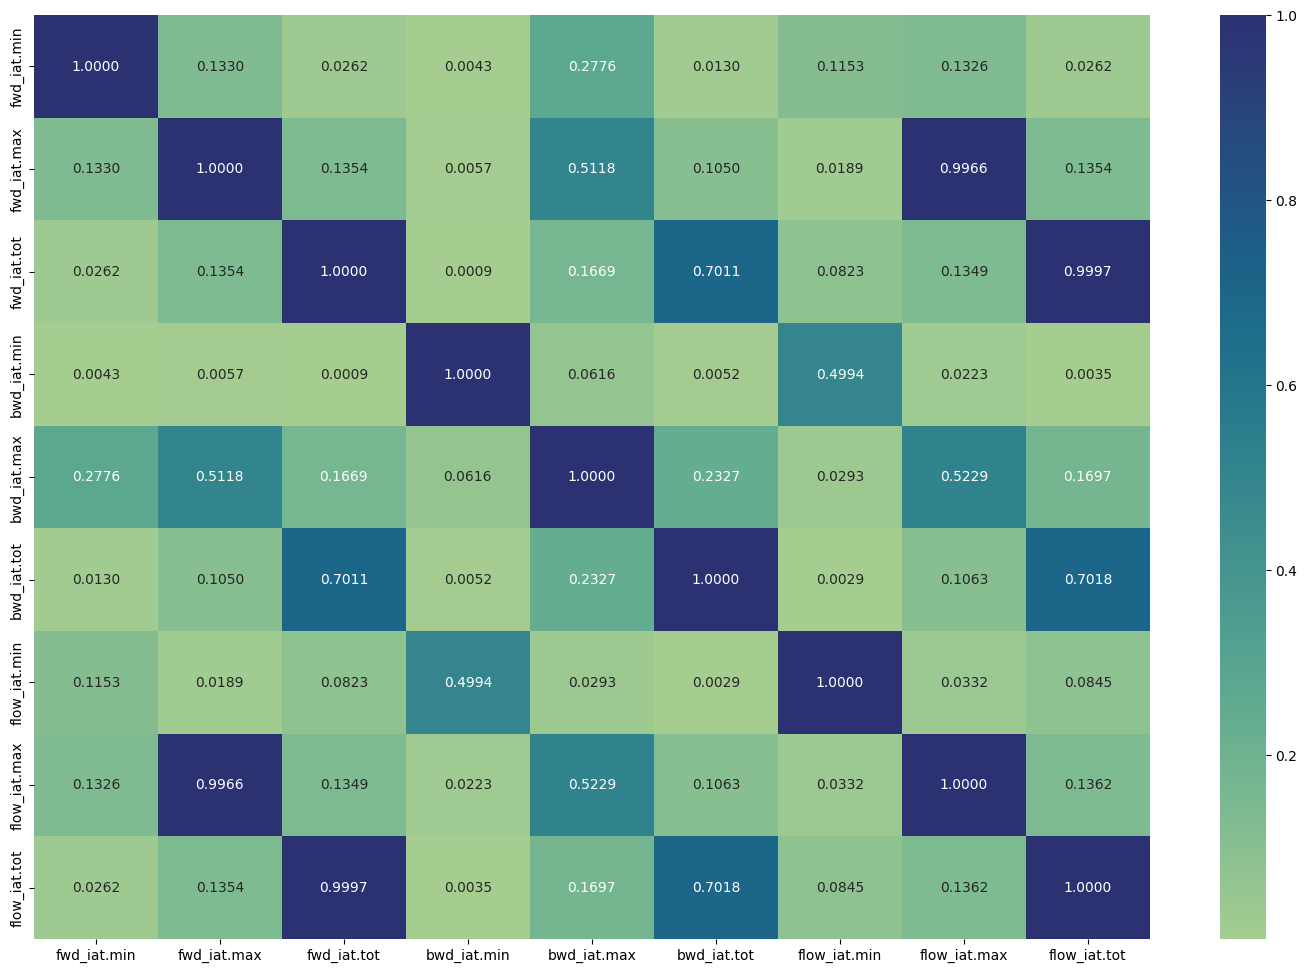

In [ ]:
plt.figure(figsize=(18,12))
testset = dt[[
    'fwd_iat.min',
    'fwd_iat.max',
    'fwd_iat.tot',
    'bwd_iat.min',
    'bwd_iat.max',
    'bwd_iat.tot',
    'flow_iat.min',
    'flow_iat.max',
    'flow_iat.tot'
]]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

fwd i bwd TOT vrednosti su u korelaciji sa flow TOT

fwd MAX je u korelaciji sa flow MAX

In [ ]:
dt = dt.drop(columns=['fwd_iat.tot', 'bwd_iat.tot', 'fwd_iat.max'])

### Provera korelacij - subflow

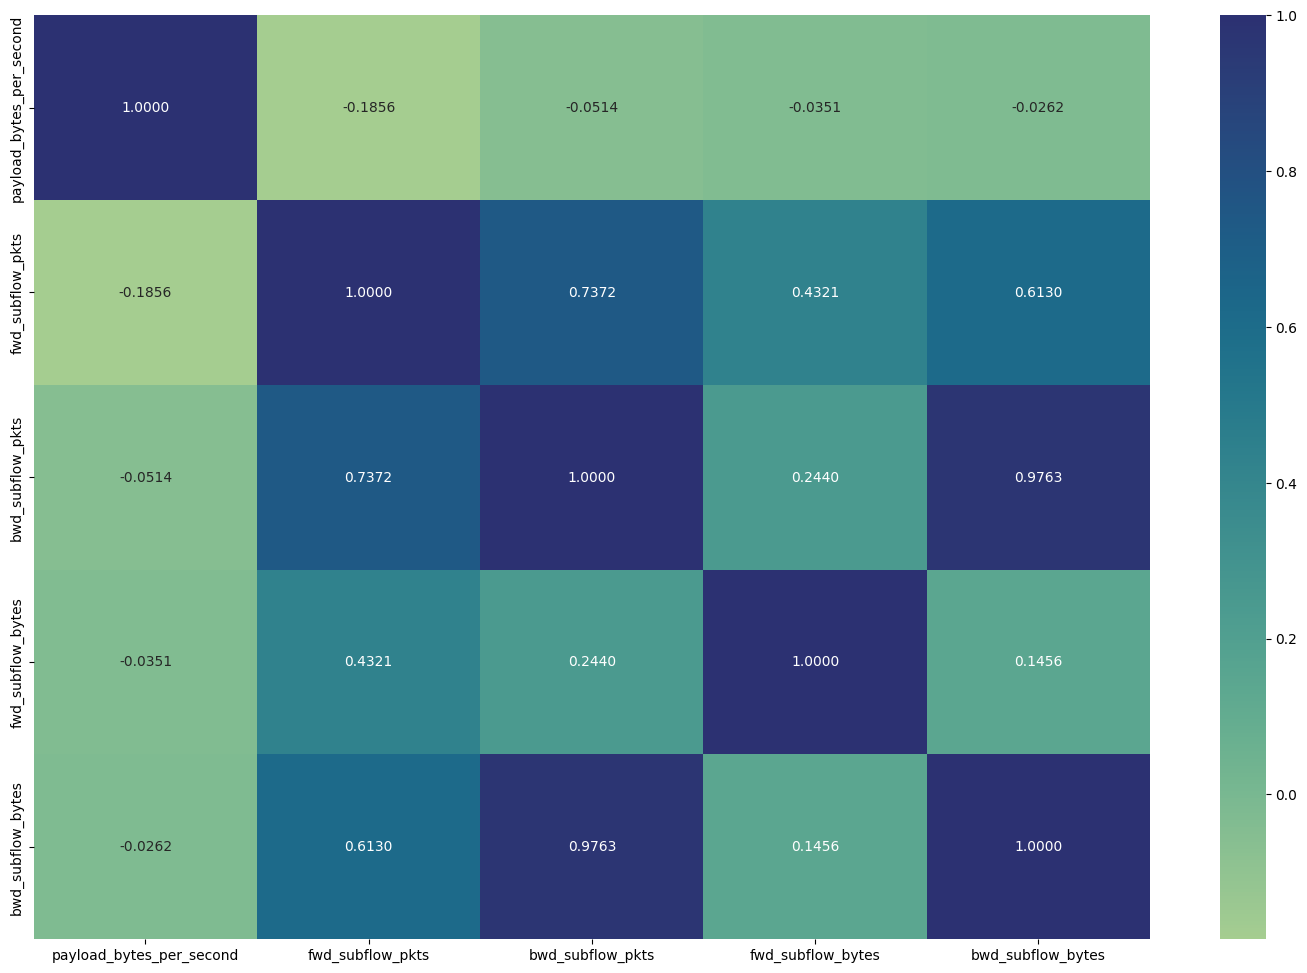

In [ ]:
plt.figure(figsize=(18,12))
testset = dt[[
    'payload_bytes_per_second',
    'fwd_subflow_pkts',
    'bwd_subflow_pkts',
    'fwd_subflow_bytes',
    'bwd_subflow_bytes',
]]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

bwd_subflow_pkts i bwd_subflow_bytes su u visokoj korelaciji
   - da li ostaviti samo jedno od njih
   - ili izracunati AVG a brisati oba

fwd_subflow_pkts i fwd_subflow_bytes nisu u tako visokoj
 -probacu sa AVG

 --> update: kada sam dodala AVG ne vredi tako da nista od dodavanja


In [ ]:
dt = dt.drop(columns=['bwd_subflow_bytes'])

### Provera korelacija - bulk

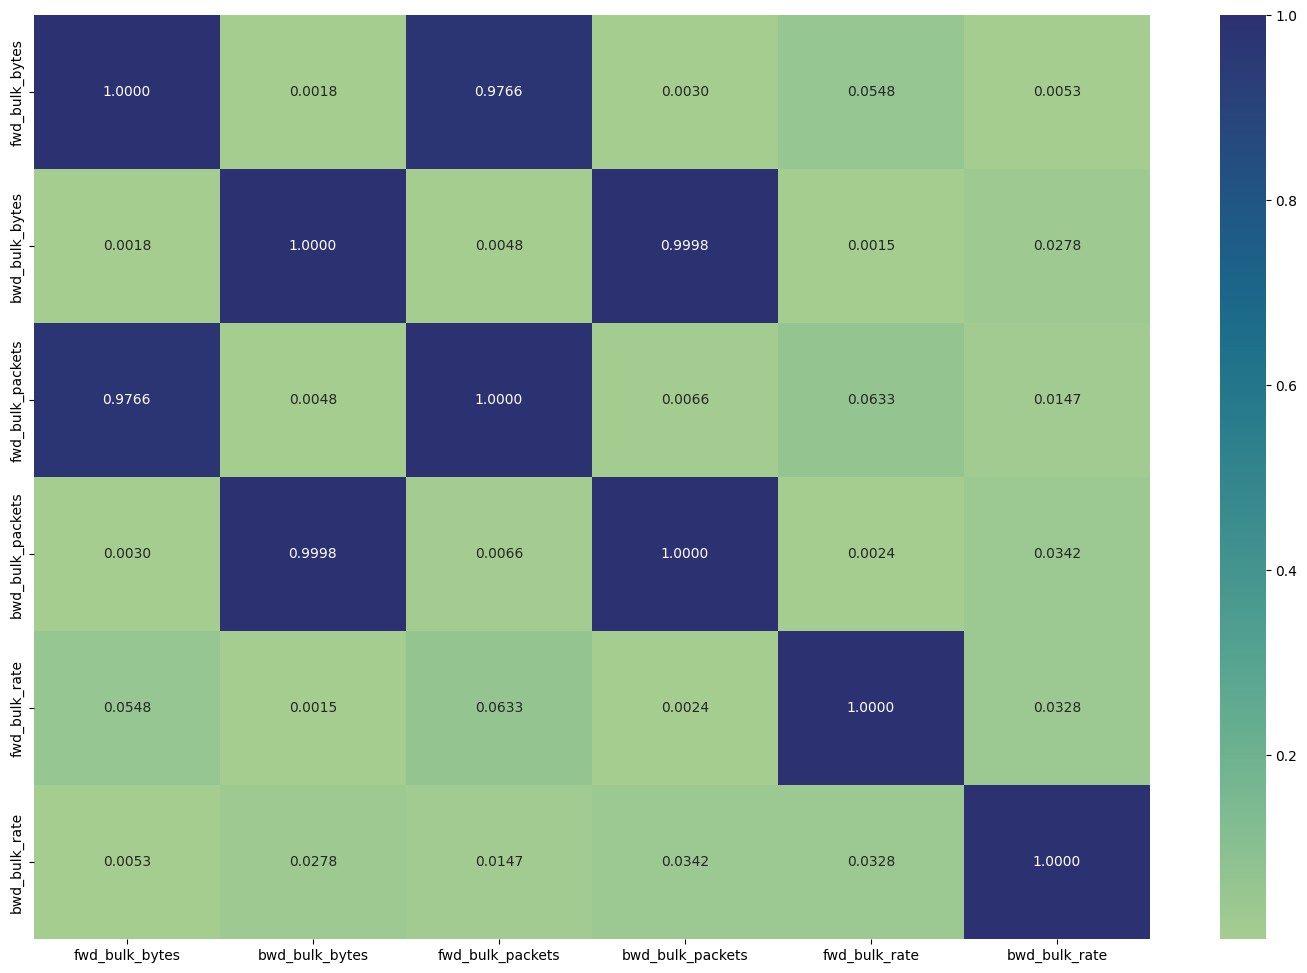

In [ ]:
plt.figure(figsize=(18,12))
testset = dt[[
    'fwd_bulk_bytes',
    'bwd_bulk_bytes',
    'fwd_bulk_packets',
    'bwd_bulk_packets',
    'fwd_bulk_rate',
    'bwd_bulk_rate',
]]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

'fwd_bulk_bytes' u visokoj korelaciji sa 'fwd_bulk_packets'

'bwd_bulk_bytes' u visokoj korelaciji sa 'bwd_bulk_packets'

In [ ]:
dt = dt.drop(columns=['fwd_bulk_bytes', 'bwd_bulk_bytes'])

### Provera korelacija - active i idle

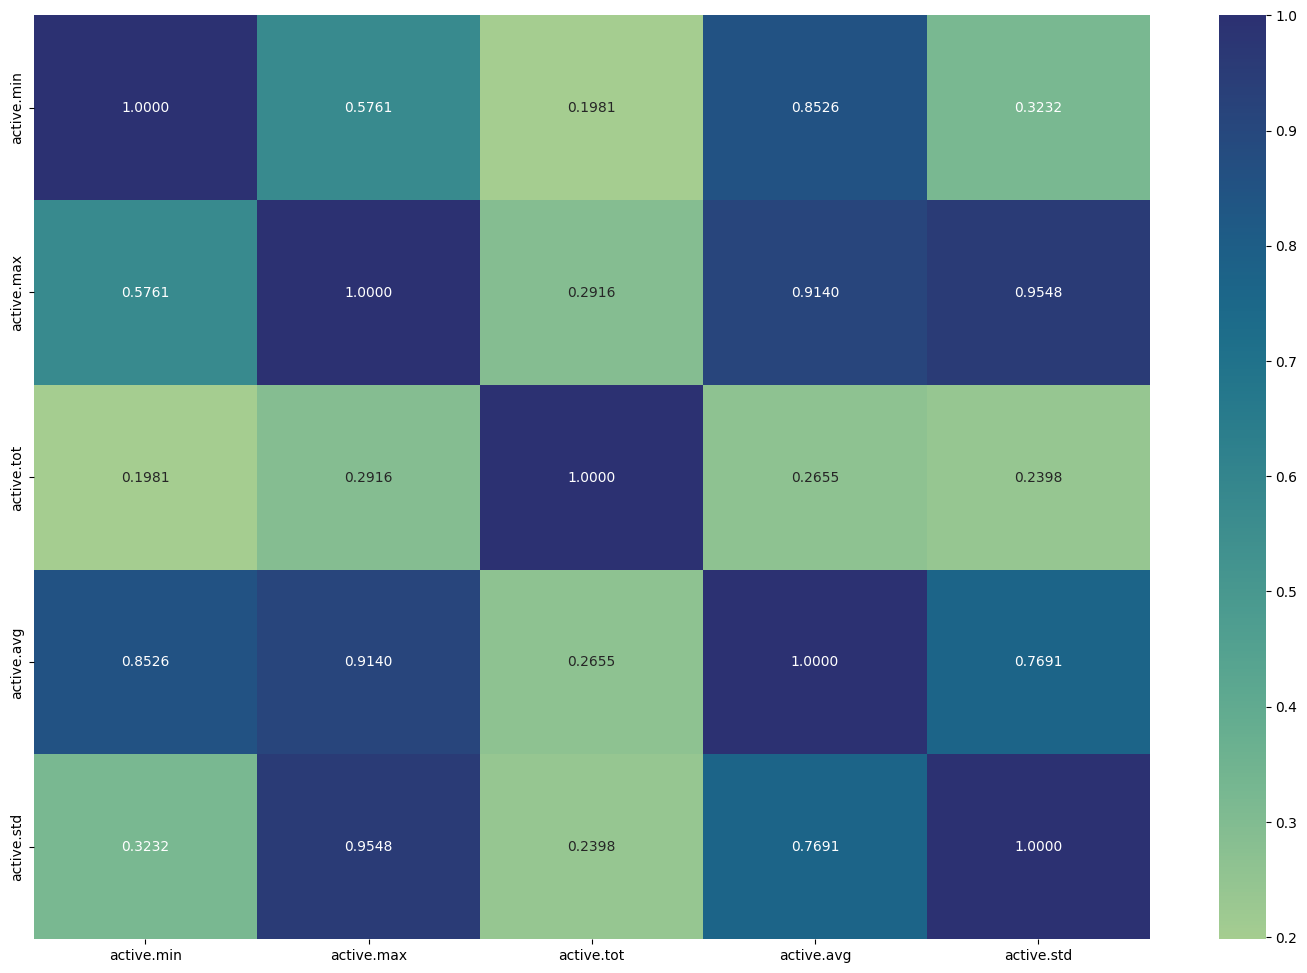

In [ ]:
plt.figure(figsize=(18,12))
testset = dt[[
    'active.min',
    'active.max',
    'active.tot',
    'active.avg',
    'active.std',
]]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

In [ ]:
dt = dt.drop(columns=['active.min',
    'active.max',
    'active.std'])

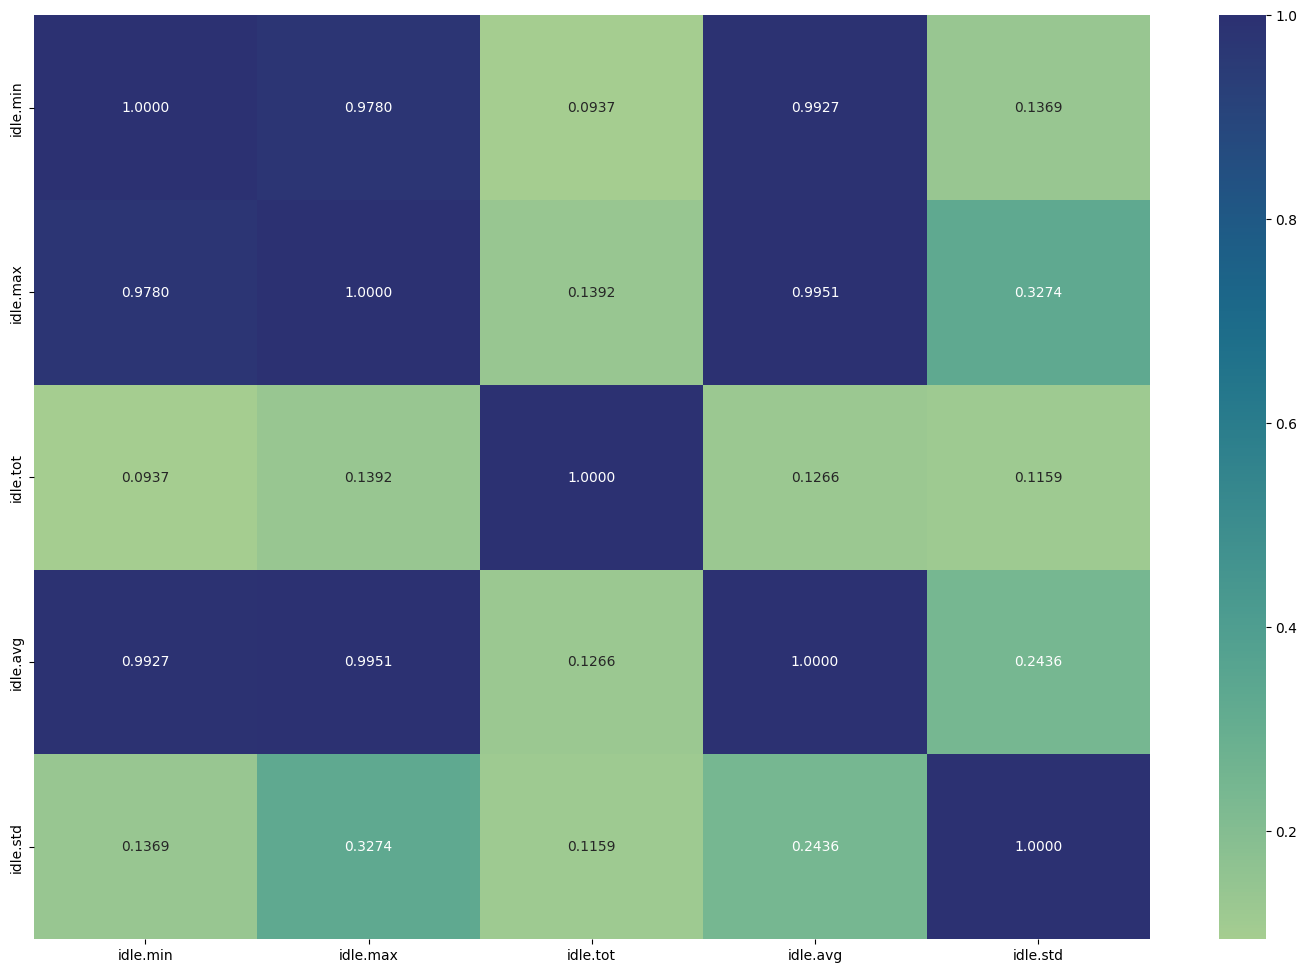

In [ ]:
plt.figure(figsize=(18,12))
testset = dt[[
'idle.min',
    'idle.max',
    'idle.tot',
    'idle.avg',
    'idle.std',
]]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

In [ ]:
dt = dt.drop(columns=['idle.min',    'idle.max'])

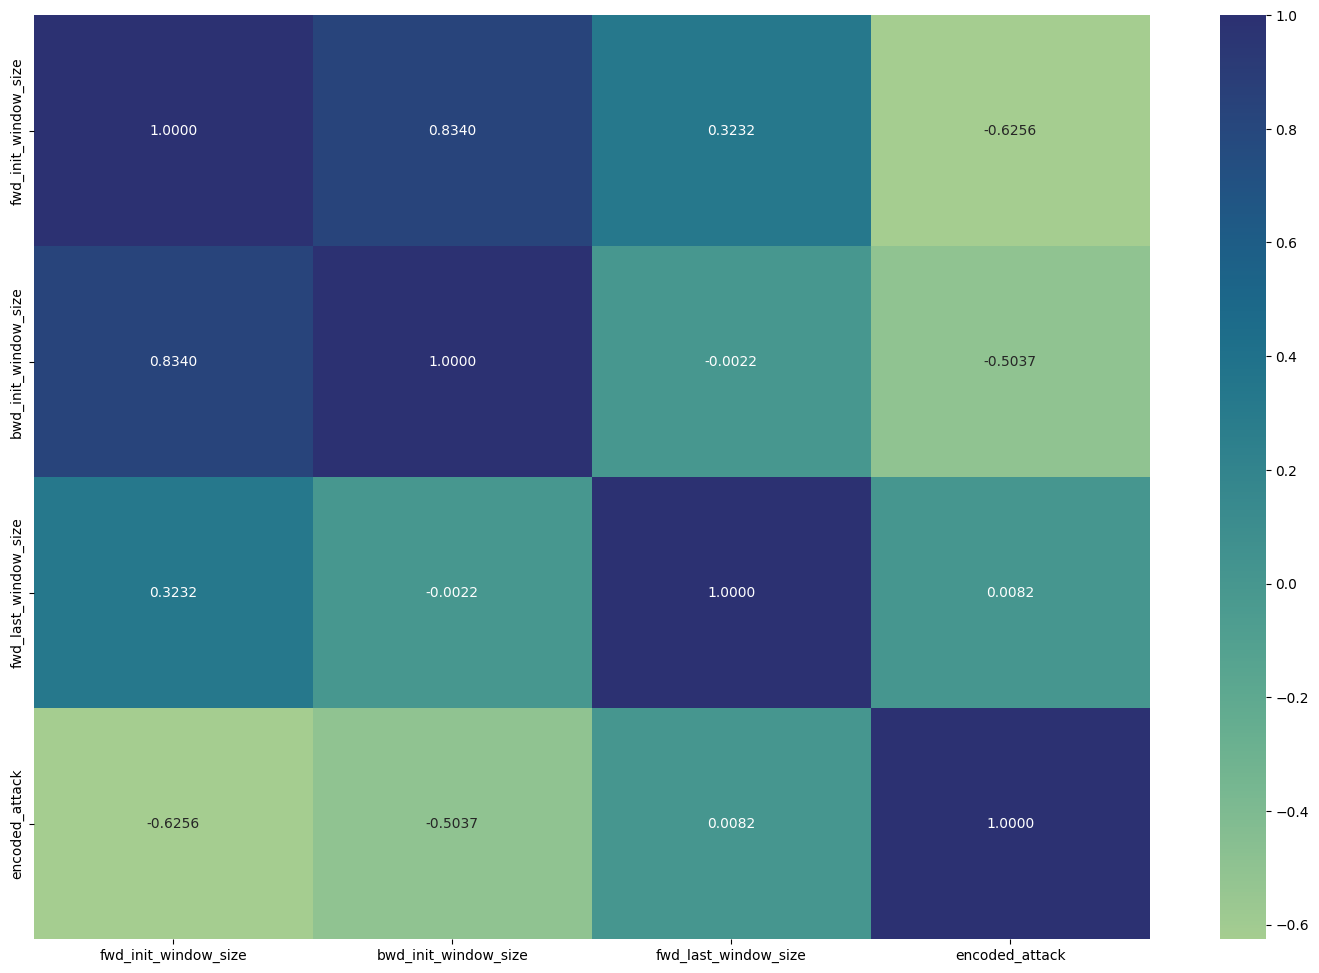

In [ ]:
plt.figure(figsize=(18,12))
testset = dt[[
    'fwd_init_window_size',
    'bwd_init_window_size',
    'fwd_last_window_size',
    'encoded_attack'
]]
sns.heatmap(testset.corr(numeric_only=True), annot=True, fmt = '.4f', cmap='crest')
plt.show()

In [ ]:
dt = dt.drop(columns=['bwd_init_window_size'])
dt = dt.drop(columns=['id.orig_p', 'id.resp_p'])

## Data distributions

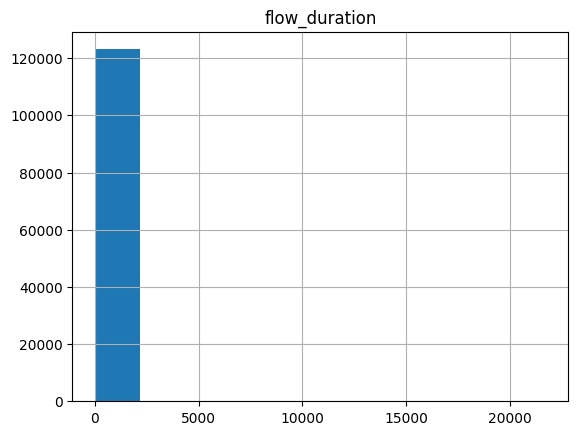

In [ ]:
dt[['flow_duration']].hist()
plt.show()

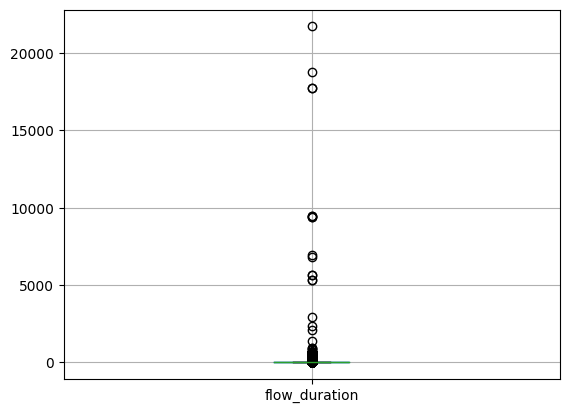

In [ ]:
dt[['flow_duration']].boxplot()
plt.show()

In [ ]:
dt.describe()

,Unnamed: 0,flow_duration,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,bwd_header_size_tot,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,...,proto_icmp,proto_tcp,proto_udp,service_0,service_1,service_2,service_3,congestion_network,fwd_header_size_avg,bwd_header_size_avg
count,123117.000000,123117.000000,1.231170e+05,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,...,123117.000000,123117.000000,123117.00000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.00000
mean,37035.089248,3.809566,7.035683e+05,0.854571,53.892379,46.626900,0.115605,0.950868,0.796454,0.351332,...,0.000463,0.896927,0.10261,0.000593,0.102236,0.885662,0.063314,0.000585,19.994016,17.86206
std,30459.106367,130.005408,7.415634e+05,0.337640,393.027195,1028.228573,0.475013,0.474262,0.436998,3.951627,...,0.021512,0.304055,0.30345,0.024343,0.302960,0.318223,0.243527,0.024176,5.648774,8.24365
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,6059.000000,0.000001,1.490871e+02,1.000000,20.000000,20.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,20.00000
50%,33100.000000,0.000004,4.934475e+05,1.000000,20.000000,20.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,20.00000
75%,63879.000000,0.000005,1.048576e+06,1.000000,20.000000,20.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,20.00000
max,94658.000000,21728.335578,2.097152e+06,6.087899,69296.000000,323592.000000,10.000000,8.000000,10.000000,864.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,44.000000,40.00000


In [ ]:
dt = dt.drop(['Unnamed: 0'], axis=1)

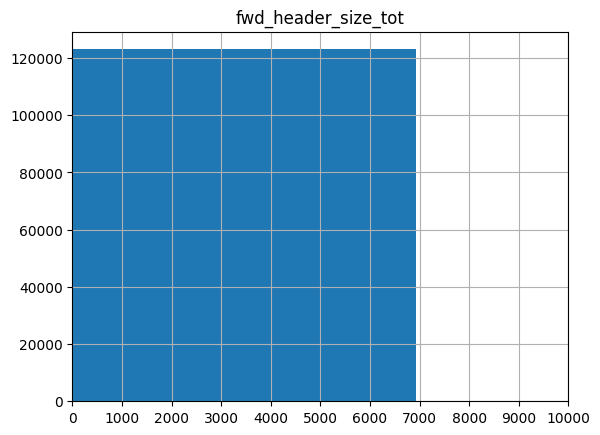

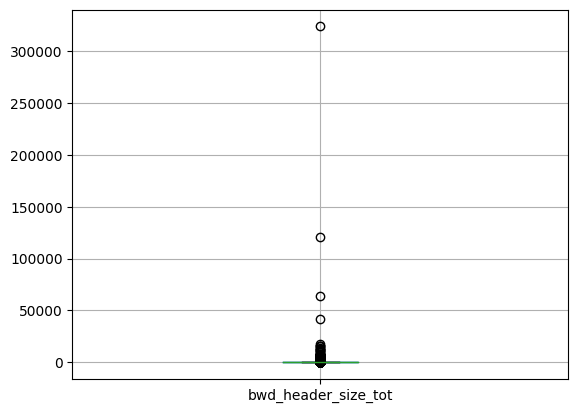

In [ ]:
dt[['fwd_header_size_tot']].hist()
# Customize horizontal axis
plt.xlim(0, 10000)  # Set the range of the x-axis
plt.xticks(range(0, 10001, 1000))  # Set the x-axis ticks
plt.show()
dt[['bwd_header_size_tot']].boxplot()
plt.show()

Provera outliera - za kolone sa velikom standardnom devijacijom

<Axes: >

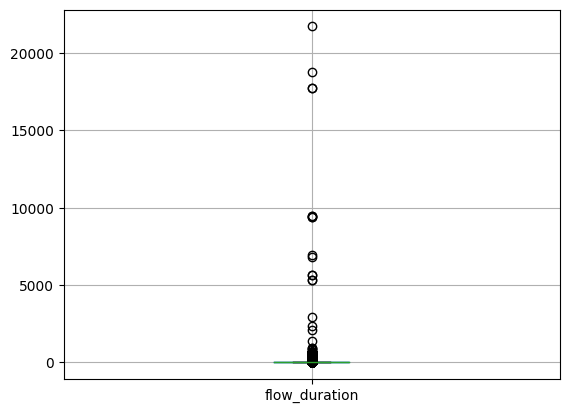

In [ ]:
dt.boxplot(column=['flow_duration'])

In [ ]:
print("Sa outlierima:")
dt.describe()

Sa outlierima:


,flow_duration,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,bwd_header_size_tot,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,...,proto_icmp,proto_tcp,proto_udp,service_0,service_1,service_2,service_3,congestion_network,fwd_header_size_avg,bwd_header_size_avg
count,123117.000000,1.231170e+05,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,...,123117.000000,123117.000000,123117.00000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.00000
mean,3.809566,7.035683e+05,0.854571,53.892379,46.626900,0.115605,0.950868,0.796454,0.351332,0.393634,...,0.000463,0.896927,0.10261,0.000593,0.102236,0.885662,0.063314,0.000585,19.994016,17.86206
std,130.005408,7.415634e+05,0.337640,393.027195,1028.228573,0.475013,0.474262,0.436998,3.951627,6.007443,...,0.021512,0.304055,0.30345,0.024343,0.302960,0.318223,0.243527,0.024176,5.648774,8.24365
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000001,1.490871e+02,1.000000,20.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,20.00000
50%,0.000004,4.934475e+05,1.000000,20.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,20.00000
75%,0.000005,1.048576e+06,1.000000,20.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,20.00000
max,21728.335578,2.097152e+06,6.087899,69296.000000,323592.000000,10.000000,8.000000,10.000000,864.000000,1446.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,44.000000,40.00000


In [ ]:
def remove_outliers(df):
    df_no_outliers = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        filter = (df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))
        df_no_outliers = df_no_outliers[filter]
    return df_no_outliers
print("Bez outliera:")
dt_no_outliers = remove_outliers(dt)
dt_no_outliers.describe()


Bez outliera:


,flow_duration,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,bwd_header_size_tot,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,...,proto_icmp,proto_tcp,proto_udp,service_0,service_1,service_2,service_3,congestion_network,fwd_header_size_avg,bwd_header_size_avg
count,84822.000000,8.482200e+04,84822.0,84822.0,84822.0,84822.0,84822.0,84822.0,84822.0,84822.0,...,84822.0,84822.0,84822.0,84822.0,84822.0,84822.0,84822.0,84822.0,84822.0,84822.0
mean,0.000003,9.925530e+05,1.0,20.0,20.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,20.0
std,0.000002,7.110597e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000e+00,1.0,20.0,20.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,20.0
25%,0.000001,4.934475e+05,1.0,20.0,20.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,20.0
50%,0.000004,5.242880e+05,1.0,20.0,20.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,20.0
75%,0.000004,1.677722e+06,1.0,20.0,20.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,20.0
max,0.000011,2.097152e+06,1.0,20.0,20.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,20.0


Necemo brisati outliere jer gubimo informacije.

Neki outlier-i mogu da ukazuju na napad.

## Preuzimanje sređenog CSV fajla

In [ ]:
dt.to_csv('RT_IOT2022_reduced.csv')